# Problems
***
# 1. Data Set: Fifa

There are 8847 observations (players) with 19 features:
* id, name, rating, position, height, foot, rare, pace, shooting, passing, dribbling, defending, heading, diving, handling, kicking, reflexes, speed, positioning

<img src="img/fifa_info.png", width=400>

### Missing Value in Data Analysis
How do i deal with missing value? What are the different methods to handle these missing values.
￼
It depends a lot on the specific case. However, some general methods are:

##### Pattern Removal 
Remove pattern from dataset if such pattern has at least one missing value.
If there are loads of patterns with missing values, however, I would not suggest such approach since the number of patterns in your dataset will drastically decrease and the training phase will not be adeguate.
##### The mean/mode approach.
If pattern has a missing value in position j take the mean (if j-th attribute is continuous) or mode (if j-th attribute is categorical) of the j-th column and substitute such mean/mode in your pattern's j-th position. Obviously in the mean/mode evaluation you should consider only non-missing values from column j.
##### The conditional mean/mode.
If you have the labels (i.e. supervised learning), you can consider the previous approach but taking into account, in the mean/mode evaluation, only (non-missing) elements from column j belonging to patterns that have the very same label as the pattern you're trying to fix. This essentially refines the previous method because you do not consider values for patterns belonging to a different class.
##### Hot-decking.
Given a certain dissimilarity metric, you can measure the dissimilarity between the pattern you want to fix and all the other patterns that are not missing values in the attribute to be imputed (j-th attribute in our case). Take the j-th feature from the most similar pattern and substitute it back in the j-th position of the pattern you want to fix.
##### K-Nearest Neighbours.
That is similar to Hot-decking but instead of considering the most similar pattern, you can consider the K most similar patterns that are not missing value in our j-th feature. Consider then the most frequent item (mode) amongst the j-th feature of these K patterns.

<img src="img/fifa_corr.png", width=800>


Let's to apply all we have learn to this data set.

#### Instructions
> - Read ```data/fifa_numeric.csv``` with the ```read_csv``` function from the ```pandas``` module: ```data_pd``` 
> - Create a list of columns, ```lof```, without including ```id``` and ```name``` columns. For that, loop all columns (get the names from ```data_pd.columns```), and except for first and second, store the values of each column ```data_pd[col_name].values``` as an entry of the list ```lof```
> - Define a list with the name of the columns: ```rating,position,height,foot, rare,pace,shooting,passing,dribbling, defending,heading,diving, handling,kicking,reflexes,speed,positioning```
> - Convert the list ```lof``` to a tuple object by calling ```tuple```
> - Convert this list into a ndarray of shape (8847, 17) by calling the function ```np.column_stack()``` with the tuple as an imput. This ndarray will be our data for this exercise, ```data```

> - Missing data? How many observations (i.e. rows) have some missing features? Use the function ```isnan()``` from the ```numpy``` module to detect which values are missed, the output of isnan is a boolean array. To get the sum of all ```nan``` you can use ```sum``` also from ```numpy```
> - Try to plot the histogram of column 2 ```data[:,2]```
> - Now try to plot the histogram of column 6, ```data[:,6]```,  Did you got an error? Print its mean
> - Some of the functions from ```numpy``` or ```scipy``` modules do not allow ```nan``` values, for that we will convert the ndarray into a ```masked array``` by calling the function ```np.ma.array()``` with ```data``` as the first argument, and the output of ```nan_in_data=np.isnana(data)``` as the argument for the optional parameter ```mask=nan_in_data```
> - Explore the output of the previous step: ```data_ma```
> - By using the function ```compressed()``` (which is a data member of your masked data), plot again the histogram of column 6 ```data_ma[:,6].compressed()``` as an input of ```hist``` 
> - Using EDA plots, explore data from column 6 and 7 of the ndarray ```data_ma```: histogram, bee swarm plot, box plot,  ecdf, scatter plot, ... 
> - Compute all statistics (explained in this session) from column 6
> - Replace missing value by its mean
> - Do we have outliers?
> - correlations?

In [1]:
import numpy as np
from scipy import loadtxt
import seaborn as sns
sns.set()

from matplotlib import pylab as plt


In [2]:
import pandas as pd

data_pd = pd.read_csv("data/fifa_numeric.csv")


In [3]:
loc = []
for col in data_pd.columns[2:]:
    print " Adding ", col
    loc.append( data_pd[col].values)

 Adding  rating
 Adding  position
 Adding  height
 Adding  foot
 Adding  rare
 Adding  pace
 Adding  shooting
 Adding  passing
 Adding  dribbling
 Adding  defending
 Adding  heading
 Adding  diving
 Adding  handling
 Adding  kicking
 Adding  reflexes
 Adding  speed
 Adding  positioning


In [4]:
type(loc)


list

In [5]:
toc = tuple(loc)

In [114]:
column_name = ['rating','position','height','foot', 'rare','pace','shooting',
               'passing','dribbling', 'defending','heading','diving', 'handling',
               'kicking','reflexes','speed','positioning']
### stacking data to a ndarray
data = np.column_stack(toc)

In [7]:
type(data)

numpy.ndarray

In [8]:
data[5]

array([  72.,    4.,  187.,    0.,    1.,   50.,   37.,   47.,   43.,
         76.,   82.,   nan,   nan,   nan,   nan,   nan,   nan])

In [9]:
data.shape

(8847, 17)

In [10]:
np.isnan(data).any()

True

In [11]:
#### number of observations with data for each column
sum(~np.isnan(data))

array([8847, 8847, 8847, 8847, 8847, 7917, 7917, 7917, 7917, 7917, 7917,
        930,  930,  930,  930,  930,  930])

In [12]:
#### number of observations without data for each column
sum(np.isnan(data))

array([   0,    0,    0,    0,    0,  930,  930,  930,  930,  930,  930,
       7917, 7917, 7917, 7917, 7917, 7917])

In [13]:
### mean statistics
np.nanmean(data, axis=0)


array([  66.68045665,    2.50141291,  181.75042387,    0.23567311,
          0.35311405,   67.93406593,   55.06075534,   58.84552229,
         61.19388657,   60.33952255,   63.74333712,   67.3516129 ,
         64.73978495,   63.06774194,   68.8655914 ,   48.21290323,
         64.95591398])

In [14]:
data[:,0].mean()

66.68045665197242

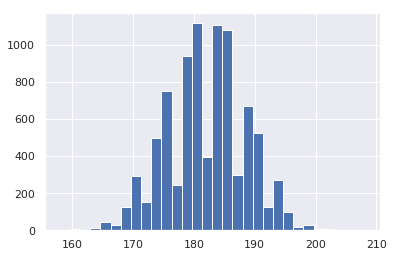

In [15]:
_ = plt.hist(data[:,2], bins=30)
plt.show()

In [16]:
_ = plt.histogram(data[:,6], bins=30)
plt.show()

ValueError: range parameter must be finite.

In [17]:
data[:,6].mean()

nan

In [18]:
nan_in_data = np.isnan(data)
data_ma = np.ma.array(data, mask= nan_in_data )
data_ma

masked_array(data =
 [[69.0 3.0 191.0 ..., 74.0 35.0 66.0]
 [65.0 2.0 184.0 ..., -- -- --]
 [57.0 1.0 185.0 ..., -- -- --]
 ..., 
 [68.0 4.0 183.0 ..., -- -- --]
 [65.0 4.0 179.0 ..., -- -- --]
 [69.0 2.0 179.0 ..., -- -- --]],
             mask =
 [[False False False ..., False False False]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)

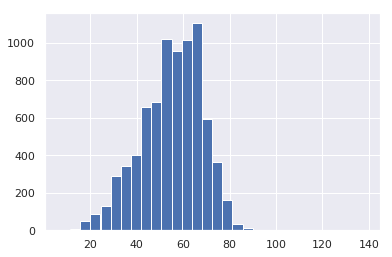

In [22]:
_ = plt.hist(data_ma[:,6].compressed(), bins=30 )
plt.show()

In [23]:
data_ma = data[:,6].compressed()

AttributeError: 'numpy.ndarray' object has no attribute 'compressed'

In [24]:
data_ma[:,6]


masked_array(data = [-- 65.0 54.0 ..., 40.0 48.0 56.0],
             mask = [ True False False ..., False False False],
       fill_value = 1e+20)

In [25]:
data_pd['shooting'].values[:10]

array([  nan,   65.,   54.,  138.,   64.,   37.,   60.,   58.,   52.,   65.])

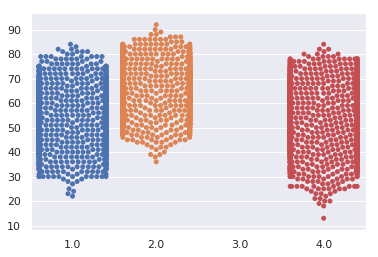

In [29]:
_ = sns.swarmplot(x=data_ma[:,1], y=data_ma[:,7])
plt.show()

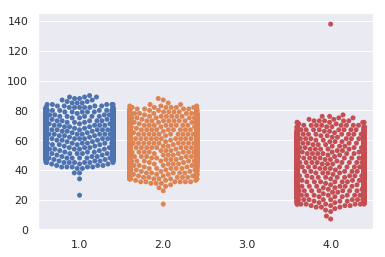

In [30]:
_ = sns.swarmplot(x=data_ma[:,1], y=data_ma[:,6])
plt.show()

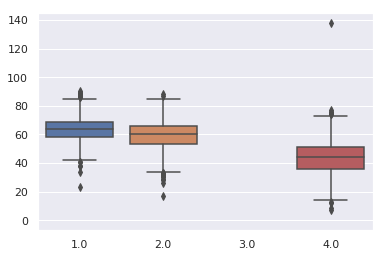

In [35]:
_ = sns.boxplot( x=data_ma[:,1], y=data_ma[:,6])
plt.show()

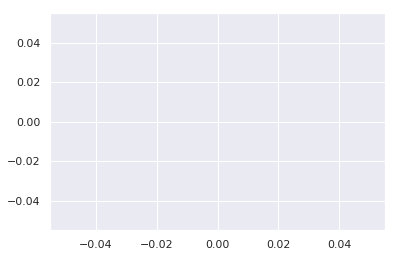

In [43]:

_ = plt.plot(x=data_ma[:,7].compressed(), y=data_ma[:,6].compressed(), marker=".", markersize=3, linestyle='none')
plt.show()


In [31]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y

In [34]:
x,y = ecdf(data_ma[:,7].compressed())

_ = plt.plot(x,y, marker=".", linestyle="none", markersize=3)

In [56]:
len(data_ma[:,10].compressed())

7917

In [82]:
hicking = data_ma[:,13]

In [83]:
hicking.mask

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [84]:
hicking

masked_array(data = [63.0 63.0 63.0 ..., -- -- --],
             mask = [False False False ...,  True  True  True],
       fill_value = 1e+20)

In [87]:
hicking_mean = np.nanmean( hicking )

In [94]:
data_ma_cp = np.where( np.isnan(data_ma), data_ma.mean(axis=0), data_ma) 

In [93]:
len(data_ma[:,13].compressed())

932

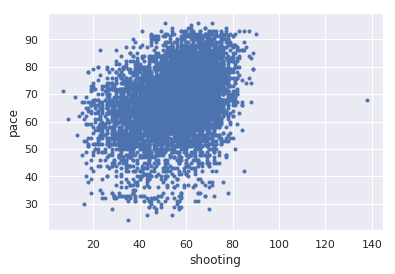

In [111]:
_ = plt.plot( data_ma_cp[:,6],data_ma_cp[:,5], marker=".", linestyle='none')
_ = plt.xlabel('shooting')
_ = plt.ylabel('pace')
plt.show()

In [102]:
data_ma_cp[:,10]

array([ 63.74333712,  62.        ,  74.        , ...,  74.        ,
        69.        ,  60.        ])

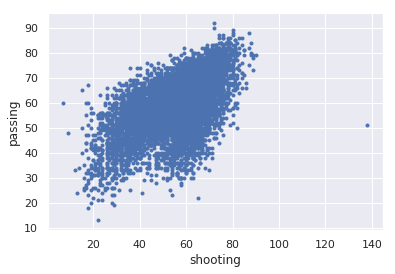

In [116]:
_ = plt.plot( data_ma_cp[:,6],data_ma_cp[:,7], marker=".", linestyle='none')
_ = plt.xlabel(column_name[6])
_ = plt.ylabel(column_name[7])
plt.show()

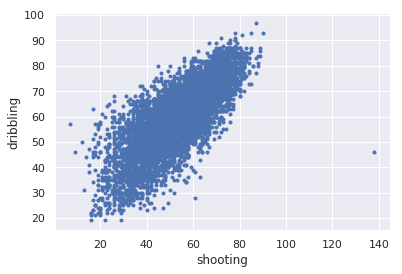

In [117]:
_ = plt.plot( data_ma_cp[:,6],data_ma_cp[:,8], marker=".", linestyle='none')
_ = plt.xlabel(column_name[6])
_ = plt.ylabel(column_name[8])
plt.show()

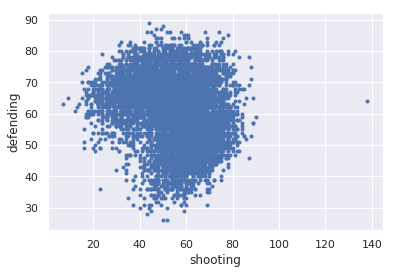

In [120]:
_ = plt.plot( data_ma_cp[:,6],data_ma_cp[:,9], marker=".", linestyle='none')
_ = plt.xlabel(column_name[6])
_ = plt.ylabel(column_name[9])
plt.show()

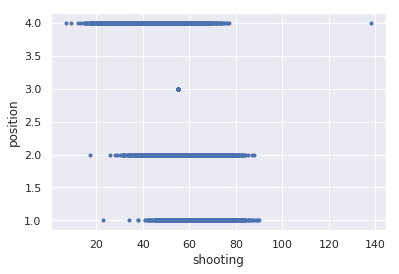

In [136]:
_ = plt.plot( data_ma_cp[:,6],data_ma_cp[:,1], marker=".", linestyle='none')
_ = plt.xlabel(column_name[6])
_ = plt.ylabel(column_name[1])
plt.show()